In [3]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas_ta
import warnings
import requests
from bs4 import BeautifulSoup
warnings.filterwarnings('ignore')

# Define start and end dates for the 8-year period

end_date = '2024-01-01'

start_date = pd.to_datetime(end_date)-pd.DateOffset(365*8)

# Download S&P 500 company tickers and their data
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()

sp500_tickers

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BLDR',
 'BG',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CHRW',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA

In [13]:
# Function to check survivorship bias
def check_survivorship_bias(sp500_tickers, start_date, end_date):
    data = pd.DataFrame()

    # Retrieve historical data for each company
    for ticker in sp500_tickers:
        try:
            # Fetch data from Yahoo Finance
            stock_data = yf.download(ticker, start=start_date, end=end_date)
            stock_data['Ticker'] = ticker  # Add a column to identify the company
            data = pd.concat([data, stock_data])
        except Exception as e:
            print(f"Failed to fetch data for {ticker}: {str(e)}")

    # Identify companies that were present in the S&P 500 during the specified period but are no longer listed
    survivorship_bias = pd.DataFrame(sp500_tickers, columns=['Ticker'])
    survivorship_bias['Present'] = survivorship_bias['Ticker'].apply(lambda x: x in data['Ticker'].unique())

    # Companies present during the entire specified period
    present_companies = survivorship_bias[survivorship_bias['Present']]

    # Companies not present throughout the entire specified period
    non_survivors = survivorship_bias[~survivorship_bias['Present']]

    return present_companies, non_survivors

# Check survivorship bias

present_companies, non_survivors = check_survivorship_bias(sp500_tickers, start_date, end_date)

print(non_survivors)




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******


1 Failed download:
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-01-03 00:00:00 -> 2024-01-01)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

In [8]:
# Filter the present companies and fetch historical data

df = yf.download(tickers=present_companies['Ticker'].tolist(), start=start_date, end=end_date).stack()

df.index.names = ['date', 'ticker']

df.columns = df.columns.str.lower()

df

[*********************100%%**********************]  501 of 501 completed


adj close       close        high         low        open  \
date       ticker                                                               
2016-01-04 A        38.134426   40.689999   41.189999   40.340000   41.060001   
           AAL      39.095467   40.910000   41.349998   40.299999   41.290001   
           AAPL     23.977474   26.337500   26.342501   25.500000   25.652500   
           ABBV     40.778069   57.610001   58.320000   56.400002   58.060001   
           ABT      36.956299   42.930000   44.049999   42.500000   43.939999   
...                       ...         ...         ...         ...         ...   
2023-12-29 YUM     130.660004  130.660004  131.250000  130.210007  130.410004   
           ZBH     121.699997  121.699997  122.400002  121.239998  121.459999   
           ZBRA    273.329987  273.329987  276.309998  272.769989  274.730011   
           ZION     43.869999   43.869999   44.650002   43.720001   44.650002   
           ZTS     197.369995  197.369995  198.009995  196.250000  196.679993   

                        volume  
date       ticker               
2016-01-04 A         3287300.0  
           AAL      12037200.0  
           AAPL    270597600.0  
           ABBV     10308400.0  
           ABT      12227500.0  
...                        ...  
2023-12-29 YUM       1196800.0  
           ZBH        849600.0  
           ZBRA       251300.0  
           ZION      1420600.0  
           ZTS       1007200.0  

[990484 rows x 6 columns]

In [9]:
#With this there should be no survivorship bias in the data, so now lets get some indicators in

df['garman_klass_vol'] = ((np.log(df['high'])-np.log(df['low']))**2)/2-(2*np.log(2)-1)*((np.log(df['adj close'])-np.log(df['open']))**2)

df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x, length=20))

df['bb_low'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,0])
                                                          
df['bb_mid'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,1])
                                                          
df['bb_high'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,2])

def compute_atr(stock_data):
    atr = pandas_ta.atr(high=stock_data['high'],
                        low=stock_data['low'],
                        close=stock_data['close'],
                        length=14)
    return atr.sub(atr.mean()).div(atr.std())

df['atr'] = df.groupby(level=1, group_keys=False).apply(compute_atr)

def compute_macd(close):
    macd = pandas_ta.macd(close=close, length=20).iloc[:,0]
    return macd.sub(macd.mean()).div(macd.std())

df['macd'] = df.groupby(level=1, group_keys=False)['adj close'].apply(compute_macd)

df['dollar_volume'] = (df['adj close']*df['volume'])/1e6

df


adj close       close        high         low        open  \
date       ticker                                                               
2016-01-04 A        38.134426   40.689999   41.189999   40.340000   41.060001   
           AAL      39.095467   40.910000   41.349998   40.299999   41.290001   
           AAPL     23.977474   26.337500   26.342501   25.500000   25.652500   
           ABBV     40.778069   57.610001   58.320000   56.400002   58.060001   
           ABT      36.956299   42.930000   44.049999   42.500000   43.939999   
...                       ...         ...         ...         ...         ...   
2023-12-29 YUM     130.660004  130.660004  131.250000  130.210007  130.410004   
           ZBH     121.699997  121.699997  122.400002  121.239998  121.459999   
           ZBRA    273.329987  273.329987  276.309998  272.769989  274.730011   
           ZION     43.869999   43.869999   44.650002   43.720001   44.650002   
           ZTS     197.369995  197.369995  198.009995  196.250000  196.679993   

                        volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2016-01-04 A         3287300.0         -0.001893        NaN       NaN   
           AAL      12037200.0         -0.000821        NaN       NaN   
           AAPL    270597600.0         -0.001233        NaN       NaN   
           ABBV     10308400.0         -0.047666        NaN       NaN   
           ABT      12227500.0         -0.010932        NaN       NaN   
...                        ...               ...        ...       ...   
2023-12-29 YUM       1196800.0          0.000030  59.338371  4.824633   
           ZBH        849600.0          0.000044  68.767247  4.753563   
           ZBRA       251300.0          0.000073  67.914673  5.415905   
           ZION      1420600.0          0.000102  62.638671  3.611585   
           ZTS       1007200.0          0.000035  66.791335  5.186448   

                     bb_mid   bb_high       atr      macd  dollar_volume  
date       ticker                                                         
2016-01-04 A            NaN       NaN       NaN       NaN     125.359299  
           AAL          NaN       NaN       NaN       NaN     470.599951  
           AAPL         NaN       NaN       NaN       NaN    6488.246976  
           ABBV         NaN       NaN       NaN       NaN     420.356642  
           ABT          NaN       NaN       NaN       NaN     451.883144  
...                     ...       ...       ...       ...            ...  
2023-12-29 YUM     4.862793  4.900952 -0.073239  0.784240     156.373892  
           ZBH     4.784470  4.815377 -1.054422  0.973531     103.396317  
           ZBRA    5.546306  5.676707 -0.154931  1.577769      68.687826  
           ZION    3.749483  3.887381  0.177122  1.943748      62.321720  
           ZTS     5.259449  5.332449  0.420520  2.164720     198.791059  

[990484 rows x 14 columns]

In [10]:
last_cols = [c for c in df.columns.unique(0) if c not in ['dollar_volume', 'volume', 'open',
                                                          'high', 'low', 'close']]

data = (pd.concat([df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume'),
                   df.unstack()[last_cols].resample('M').last().stack('ticker')],
                  axis=1)).dropna()

data

dollar_volume   adj close       atr   bb_high    bb_low  \
date       ticker                                                            
2016-02-29 A           91.918052   35.004204 -0.932886  3.620122  3.522493   
           AAL        338.977811   39.288361  0.977081  3.729458  3.547833   
           AAPL      3548.073873   22.125883 -1.017466  3.155194  3.106253   
           ABBV       357.006438   39.060570 -0.477602  3.734669  3.638599   
           ABT        245.865716   33.559803 -0.797320  3.570935  3.483742   
...                          ...         ...       ...       ...       ...   
2023-12-31 YUM        207.539266  130.660004 -0.073239  4.900952  4.824633   
           ZBH        207.682671  121.699997 -1.054422  4.815377  4.753563   
           ZBRA        98.037275  273.329987 -0.154931  5.676707  5.415905   
           ZION       102.724363   43.869999  0.177122  3.887381  3.611585   
           ZTS        335.154638  197.369995  0.420520  5.332449  5.186448   

                     bb_mid  garman_klass_vol      macd        rsi  
date       ticker                                                   
2016-02-29 A       3.571307         -0.001914 -0.240044  48.107919  
           AAL     3.638645         -0.000319  0.529239  56.664296  
           AAPL    3.130723         -0.003013 -0.330066  48.335926  
           ABBV    3.686634         -0.049102 -0.288564  47.896395  
           ABT     3.527338         -0.009363 -0.394514  47.035002  
...                     ...               ...       ...        ...  
2023-12-31 YUM     4.862793          0.000030  0.784240  59.338371  
           ZBH     4.784470          0.000044  0.973531  68.767247  
           ZBRA    5.546306          0.000073  1.577769  67.914673  
           ZION    3.749483          0.000102  1.943748  62.638671  
           ZTS     5.259449          0.000035  2.164720  66.791335  

[46763 rows x 9 columns]

In [11]:
data['dollar_volume'] = (data.loc[:, 'dollar_volume'].unstack('ticker').rolling(5*12, min_periods=12).mean().stack())

data['dollar_vol_rank'] = (data.groupby('date')['dollar_volume'].rank(ascending=False))

data = data[data['dollar_vol_rank']<150].drop(['dollar_volume', 'dollar_vol_rank'], axis=1)

data

adj close       atr   bb_high    bb_low    bb_mid  \
date       ticker                                                       
2017-01-31 AAL      42.760242  1.295678  3.891346  3.789143  3.840245   
           AAPL     28.233551 -1.191554  3.389455  3.332440  3.360948   
           ABBV     45.380970 -1.207862  3.877334  3.814875  3.846105   
           ABT      37.100903 -1.167994  3.643741  3.577130  3.610435   
           ACN     102.222717 -1.021878  4.667883  4.637933  4.652908   
...                       ...       ...       ...       ...       ...   
2023-12-31 VRTX    406.890015  1.086119  6.088512  5.817492  5.953002   
           VZ       37.700001 -1.182997  3.681654  3.632663  3.657159   
           WFC      49.220001 -0.753985  3.975643  3.800094  3.887869   
           WMT     157.649994 -0.005190  5.072549  5.018094  5.045321   
           XOM      99.980003  0.072672  4.651270  4.594084  4.622677   

                   garman_klass_vol      macd        rsi  
date       ticker                                         
2017-01-31 AAL            -0.000522 -0.163934  42.277600  
           AAPL           -0.001885 -0.108144  67.547924  
           ABBV           -0.029823 -0.322387  49.245593  
           ABT            -0.002947  0.206062  66.810948  
           ACN            -0.004494 -0.450312  41.080175  
...                             ...       ...        ...  
2023-12-31 VRTX            0.000028  3.205584  65.899356  
           VZ              0.000041  0.466400  57.985190  
           WFC             0.000025  1.913446  67.347849  
           WMT             0.000017 -0.274379  52.372668  
           XOM             0.000041 -0.683288  42.607132  

[12516 rows x 8 columns]

In [12]:
def calculate_returns(df):

    outlier_cutoff = 0.005

    lags = [1, 2, 3, 6, 9, 12]

    for lag in lags:

        df[f'return_{lag}m'] = (df['adj close']
                              .pct_change(lag)
                              .pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff),
                                                     upper=x.quantile(1-outlier_cutoff)))
                              .add(1)
                              .pow(1/lag)
                              .sub(1))
    return df
    
    
data = data.groupby(level=1, group_keys=False).apply(calculate_returns).dropna()

data

adj close       atr   bb_high    bb_low    bb_mid  \
date       ticker                                                       
2018-01-31 AAL      52.943863  1.275944  4.089372  3.908840  3.999106   
           AAPL     39.581047 -0.960483  3.781592  3.700759  3.741176   
           ABBV     86.127289  1.476496  4.536019  4.272026  4.404022   
           ABT      56.398464 -0.696011  4.073903  3.956251  4.015077   
           ACN     147.171112 -0.984613  5.015497  4.968583  4.992040   
...                       ...       ...       ...       ...       ...   
2023-12-31 VRTX    406.890015  1.086119  6.088512  5.817492  5.953002   
           VZ       37.700001 -1.182997  3.681654  3.632663  3.657159   
           WFC      49.220001 -0.753985  3.975643  3.800094  3.887869   
           WMT     157.649994 -0.005190  5.072549  5.018094  5.045321   
           XOM      99.980003  0.072672  4.651270  4.594084  4.622677   

                   garman_klass_vol      macd        rsi  return_1m  \
date       ticker                                                     
2018-01-31 AAL             0.000502  0.617048  53.332150   0.044013   
           AAPL           -0.001000 -0.414727  40.100776  -0.010636   
           ABBV           -0.033621  2.091141  62.305722   0.168700   
           ABT            -0.004175  0.975507  69.274852   0.094398   
           ACN            -0.002706  0.293258  63.135422   0.049710   
...                             ...       ...        ...        ...   
2023-12-31 VRTX            0.000028  3.205584  65.899356   0.146783   
           VZ              0.000041  0.466400  57.985190  -0.016436   
           WFC             0.000025  1.913446  67.347849   0.103835   
           WMT             0.000017 -0.274379  52.372668   0.016350   
           XOM             0.000041 -0.683288  42.607132  -0.026864   

                   return_2m  return_3m  return_6m  return_9m  return_12m  
date       ticker                                                          
2018-01-31 AAL      0.037235   0.051541   0.013139   0.028045    0.017961  
           AAPL    -0.012944  -0.001992   0.021212   0.018481    0.028553  
           ABBV     0.079892   0.077893   0.081693   0.063580    0.054846  
           ABT      0.052610   0.048209   0.041483   0.041095    0.035516  
           ACN      0.041987   0.041220   0.039210   0.032852    0.030836  
...                      ...        ...        ...        ...         ...  
2023-12-31 VRTX     0.060030   0.053758   0.024490   0.028824    0.028985  
           VZ       0.035933   0.055029   0.008786   0.002693    0.002233  
           WFC      0.117430   0.067168   0.026895   0.033852    0.017357  
           WMT     -0.015960  -0.003544   0.001708   0.008697    0.010148  
           XOM     -0.023690  -0.049736  -0.008782  -0.007363   -0.005374  

[10356 rows x 14 columns]

In [14]:
factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3',
                               'famafrench',
                               start='2010')[0].drop('RF', axis=1)

factor_data.index = factor_data.index.to_timestamp()

factor_data = factor_data.resample('M').last().div(100)

factor_data.index.name = 'date'

factor_data = factor_data.join(data['return_1m']).sort_index()

factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2018-01-31 AAL     0.0557 -0.0318 -0.0129 -0.0076 -0.0096   0.044013
           AAPL    0.0557 -0.0318 -0.0129 -0.0076 -0.0096  -0.010636
           ABBV    0.0557 -0.0318 -0.0129 -0.0076 -0.0096   0.168700
           ABT     0.0557 -0.0318 -0.0129 -0.0076 -0.0096   0.094398
           ACN     0.0557 -0.0318 -0.0129 -0.0076 -0.0096   0.049710
...                   ...     ...     ...     ...     ...        ...
2023-11-30 VRTX    0.0884 -0.0010  0.0165 -0.0389 -0.0099  -0.020160
           VZ      0.0884 -0.0010  0.0165 -0.0389 -0.0099   0.091090
           WFC     0.0884 -0.0010  0.0165 -0.0389 -0.0099   0.131192
           WMT     0.0884 -0.0010  0.0165 -0.0389 -0.0099  -0.047243
           XOM     0.0884 -0.0010  0.0165 -0.0389 -0.0099  -0.020506

[10211 rows x 6 columns]

In [15]:
observations = factor_data.groupby(level=1).size()

valid_stocks = observations[observations >= 10]

factor_data = factor_data[factor_data.index.get_level_values('ticker').isin(valid_stocks.index)]

factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2018-01-31 AAL     0.0557 -0.0318 -0.0129 -0.0076 -0.0096   0.044013
           AAPL    0.0557 -0.0318 -0.0129 -0.0076 -0.0096  -0.010636
           ABBV    0.0557 -0.0318 -0.0129 -0.0076 -0.0096   0.168700
           ABT     0.0557 -0.0318 -0.0129 -0.0076 -0.0096   0.094398
           ACN     0.0557 -0.0318 -0.0129 -0.0076 -0.0096   0.049710
...                   ...     ...     ...     ...     ...        ...
2023-11-30 VRTX    0.0884 -0.0010  0.0165 -0.0389 -0.0099  -0.020160
           VZ      0.0884 -0.0010  0.0165 -0.0389 -0.0099   0.091090
           WFC     0.0884 -0.0010  0.0165 -0.0389 -0.0099   0.131192
           WMT     0.0884 -0.0010  0.0165 -0.0389 -0.0099  -0.047243
           XOM     0.0884 -0.0010  0.0165 -0.0389 -0.0099  -0.020506

[10177 rows x 6 columns]

In [16]:
betas = (factor_data.groupby(level=1,
                            group_keys=False)
         .apply(lambda x: RollingOLS(endog=x['return_1m'], 
                                     exog=sm.add_constant(x.drop('return_1m', axis=1)),
                                     window=min(24, x.shape[0]),
                                     min_nobs=len(x.columns)+1)
         .fit(params_only=True)
         .params
         .drop('const', axis=1)))

betas 

Mkt-RF       SMB       HML       RMW       CMA
date       ticker                                                  
2018-01-31 AAL          NaN       NaN       NaN       NaN       NaN
           AAPL         NaN       NaN       NaN       NaN       NaN
           ABBV         NaN       NaN       NaN       NaN       NaN
           ABT          NaN       NaN       NaN       NaN       NaN
           ACN          NaN       NaN       NaN       NaN       NaN
...                     ...       ...       ...       ...       ...
2023-11-30 VRTX    0.376325 -0.326450 -0.445173  0.319231  0.869450
           VZ      0.444391 -0.662956  0.517150  0.210200 -0.205922
           WFC     1.037896  0.401002  2.011853 -0.363961 -1.477538
           WMT     0.497263  0.081987 -0.731000  0.577487  0.752985
           XOM     0.722589 -0.210772  1.202658  0.229338  0.172209

[10177 rows x 5 columns]

In [17]:
factors = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']

data = (data.join(betas.groupby('ticker').shift()))

data.loc[:, factors] = data.groupby('ticker', group_keys=False)[factors].apply(lambda x: x.fillna(x.mean()))

data = data.drop('adj close', axis=1)

data = data.dropna()

data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10191 entries, (Timestamp('2018-01-31 00:00:00'), 'AAL') to (Timestamp('2023-12-31 00:00:00'), 'XOM')
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   atr               10191 non-null  float64
 1   bb_high           10191 non-null  float64
 2   bb_low            10191 non-null  float64
 3   bb_mid            10191 non-null  float64
 4   garman_klass_vol  10191 non-null  float64
 5   macd              10191 non-null  float64
 6   rsi               10191 non-null  float64
 7   return_1m         10191 non-null  float64
 8   return_2m         10191 non-null  float64
 9   return_3m         10191 non-null  float64
 10  return_6m         10191 non-null  float64
 11  return_9m         10191 non-null  float64
 12  return_12m        10191 non-null  float64
 13  Mkt-RF            10191 non-null  float64
 14  SMB               10191 non-null  float64
 15  HML        

In [27]:
from sklearn.cluster import KMeans

data = data.drop('cluster', axis=1)

def get_clusters(df):
    df['cluster'] = KMeans(n_clusters=4,
                           random_state=0,
                           init=initial_centroids).fit(df).labels_
    return df

data = data.dropna().groupby('date', group_keys=False).apply(get_clusters)

data

atr   bb_high    bb_low    bb_mid  garman_klass_vol  \
date       ticker                                                             
2018-01-31 AAL     1.275944  4.089372  3.908840  3.999106          0.000502   
           AAPL   -0.960483  3.781592  3.700759  3.741176         -0.001000   
           ABBV    1.476496  4.536019  4.272026  4.404022         -0.033621   
           ABT    -0.696011  4.073903  3.956251  4.015077         -0.004175   
           ACN    -0.984613  5.015497  4.968583  4.992040         -0.002706   
...                     ...       ...       ...       ...               ...   
2023-12-31 VRTX    1.086119  6.088512  5.817492  5.953002          0.000028   
           VZ     -1.182997  3.681654  3.632663  3.657159          0.000041   
           WFC    -0.753985  3.975643  3.800094  3.887869          0.000025   
           WMT    -0.005190  5.072549  5.018094  5.045321          0.000017   
           XOM     0.072672  4.651270  4.594084  4.622677          0.000041   

                       macd        rsi  return_1m  return_2m  return_3m  \
date       ticker                                                         
2018-01-31 AAL     0.617048  53.332150   0.044013   0.037235   0.051541   
           AAPL   -0.414727  40.100776  -0.010636  -0.012944  -0.001992   
           ABBV    2.091141  62.305722   0.168700   0.079892   0.077893   
           ABT     0.975507  69.274852   0.094398   0.052610   0.048209   
           ACN     0.293258  63.135422   0.049710   0.041987   0.041220   
...                     ...        ...        ...        ...        ...   
2023-12-31 VRTX    3.205584  65.899356   0.146783   0.060030   0.053758   
           VZ      0.466400  57.985190  -0.016436   0.035933   0.055029   
           WFC     1.913446  67.347849   0.103835   0.117430   0.067168   
           WMT    -0.274379  52.372668   0.016350  -0.015960  -0.003544   
           XOM    -0.683288  42.607132  -0.026864  -0.023690  -0.049736   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2018-01-31 AAL      0.013139   0.028045    0.017961  1.249866  1.364709   
           AAPL     0.021212   0.018481    0.028553  1.309648 -0.322088   
           ABBV     0.081693   0.063580    0.054846  0.471598  0.471136   
           ABT      0.041483   0.041095    0.035516  0.817002 -0.161577   
           ACN      0.039210   0.032852    0.030836  1.214378 -0.164182   
...                      ...        ...         ...       ...       ...   
2023-12-31 VRTX     0.024490   0.028824    0.028985  0.524203 -0.033998   
           VZ       0.008786   0.002693    0.002233  0.488887 -0.360818   
           WFC      0.026895   0.033852    0.017357  1.076098 -0.094077   
           WMT      0.001708   0.008697    0.010148  0.610658 -0.446031   
           XOM     -0.008782  -0.007363   -0.005374  1.138796  0.273601   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2018-01-31 AAL     0.550423  0.308895  0.674378        1  
           AAPL   -0.616277  0.569705  0.568893        0  
           ABBV   -0.092798  0.370266  0.262703        2  
           ABT    -0.518632  0.287617  0.988570        3  
           ACN    -0.309568  0.294671  0.177456        2  
...                     ...       ...       ...      ...  
2023-12-31 VRTX   -0.891779  0.173035  0.871196        0  
           VZ      0.085435  0.292000  0.474503        2  
           WFC     1.438221 -0.732210 -0.616142        0  
           WMT    -0.313553  0.315892  0.700379        2  
           XOM     0.675689 -0.489317  0.647679        1  

[10191 rows x 19 columns]

In [28]:
def plot_clusters(data):

    cluster_0 = data[data['cluster']==0]
    cluster_1 = data[data['cluster']==1]
    cluster_2 = data[data['cluster']==2]
    cluster_3 = data[data['cluster']==3]

    plt.scatter(cluster_0.iloc[:,0] , cluster_0.iloc[:,6] , color = 'red', label='cluster 0')
    plt.scatter(cluster_1.iloc[:,0] , cluster_1.iloc[:,6] , color = 'green', label='cluster 1')
    plt.scatter(cluster_2.iloc[:,0] , cluster_2.iloc[:,6] , color = 'blue', label='cluster 2')
    plt.scatter(cluster_3.iloc[:,0] , cluster_3.iloc[:,6] , color = 'black', label='cluster 3')
    
    plt.legend()
    plt.show()
    return

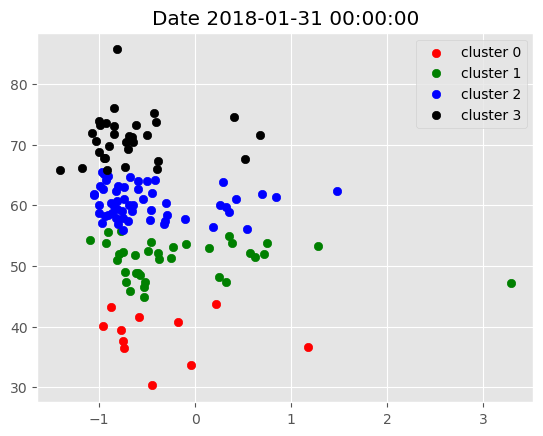

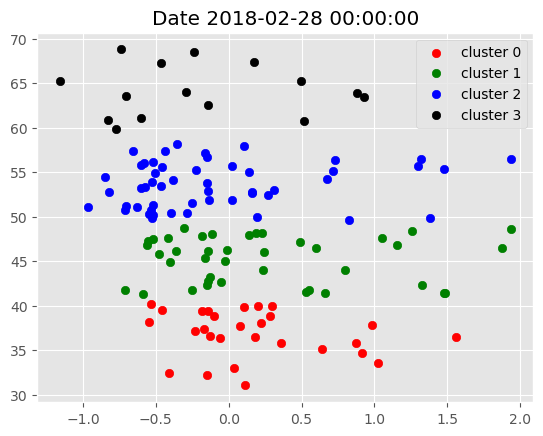

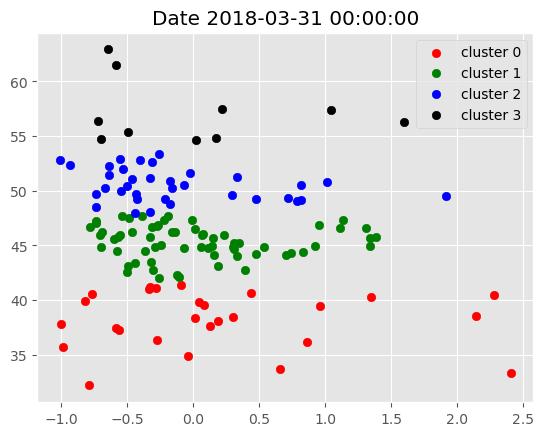

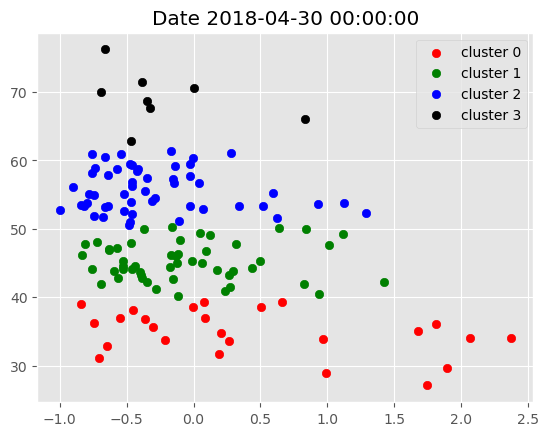

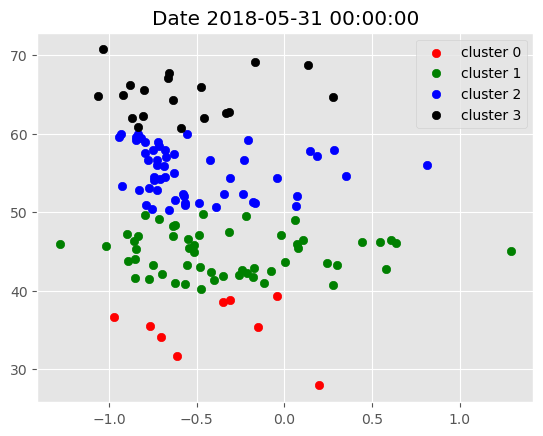

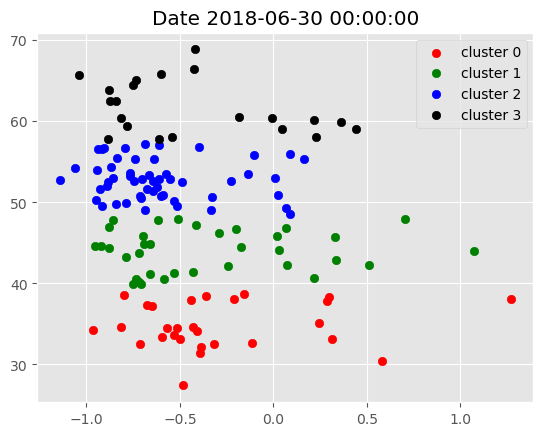

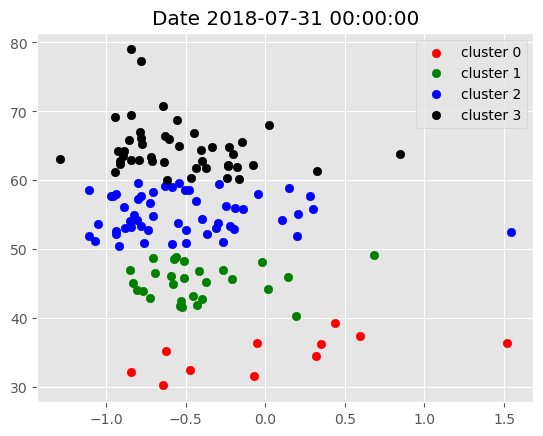

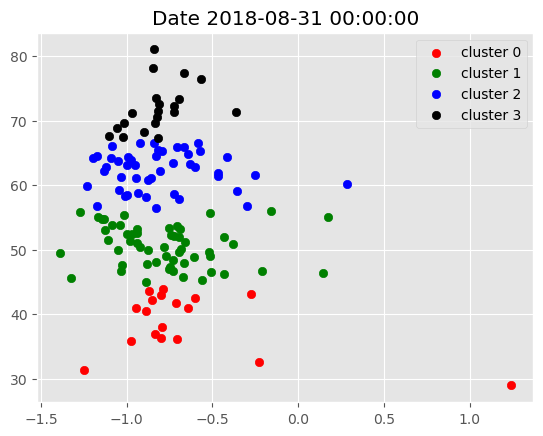

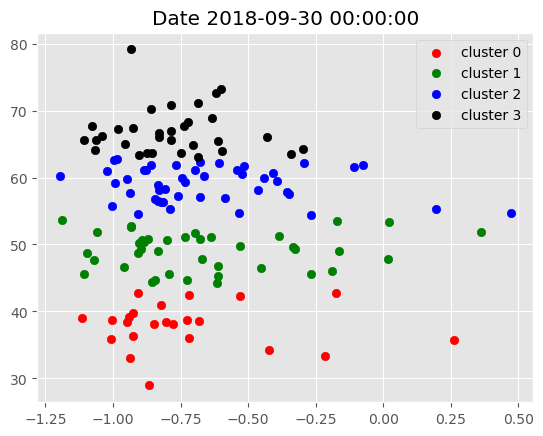

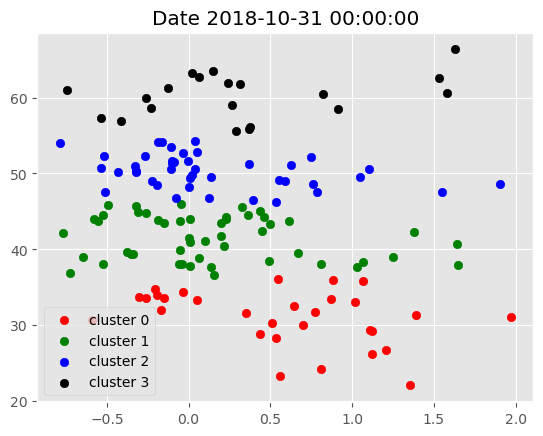

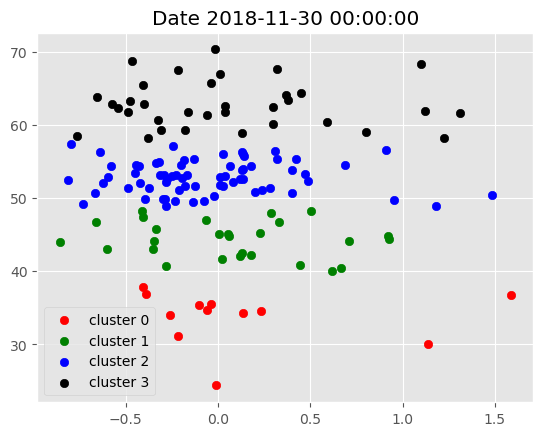

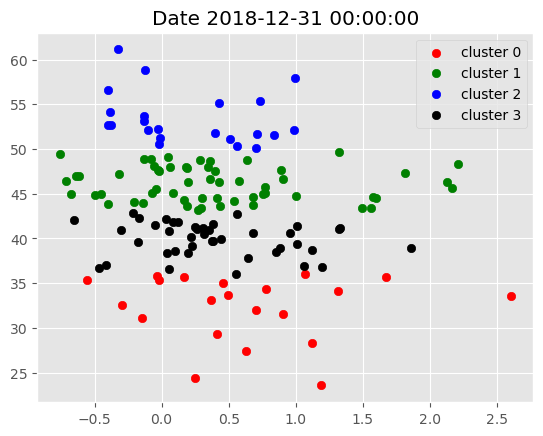

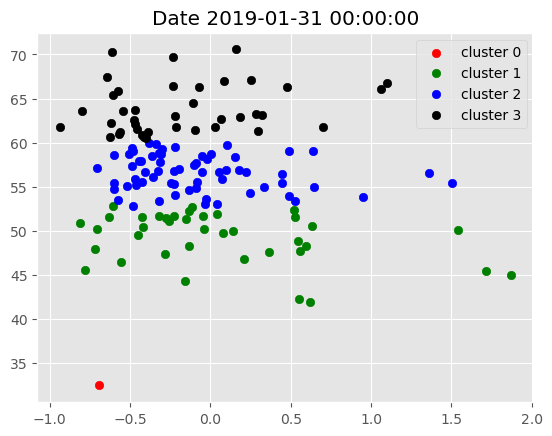

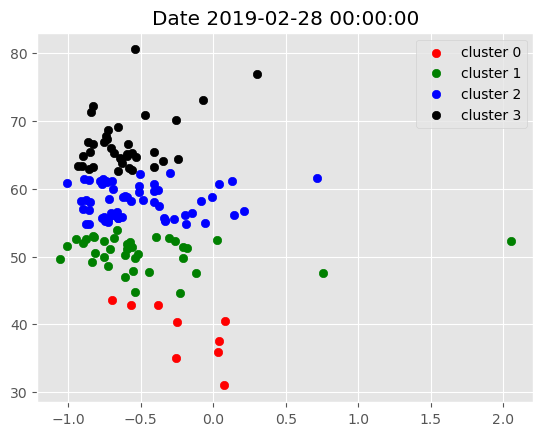

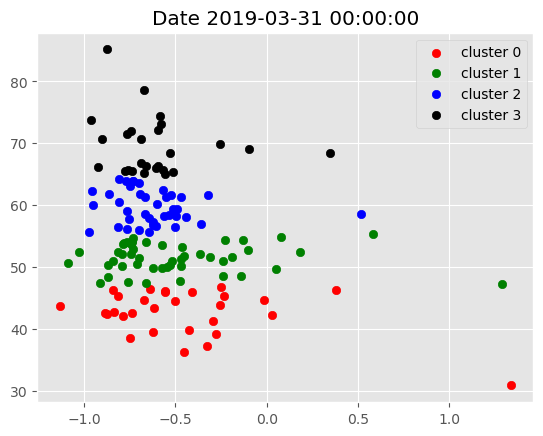

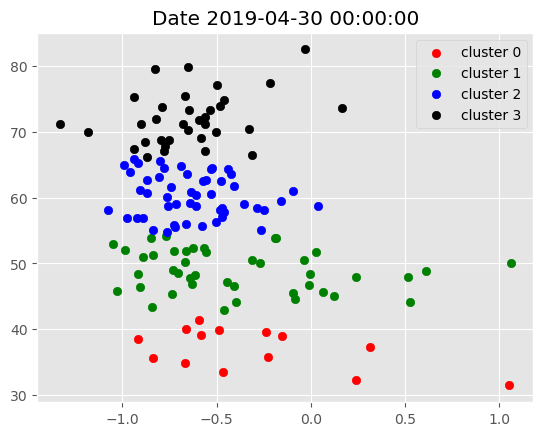

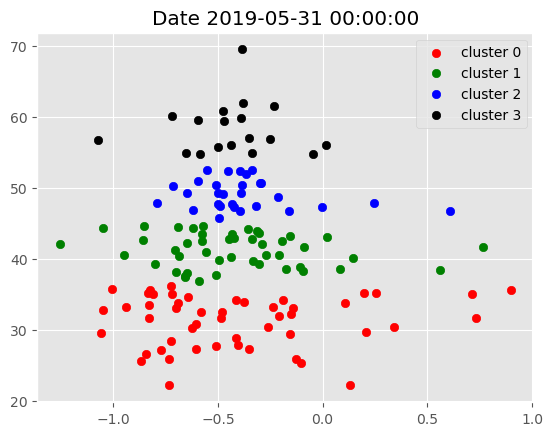

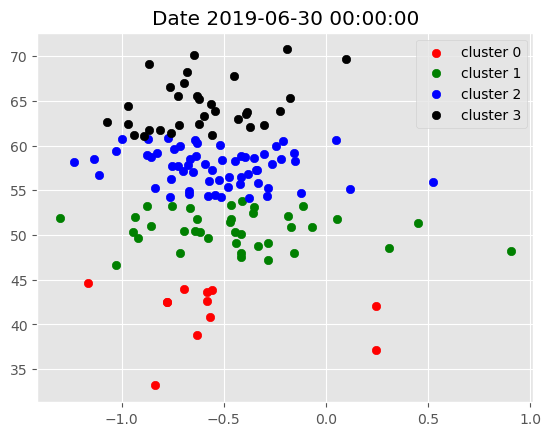

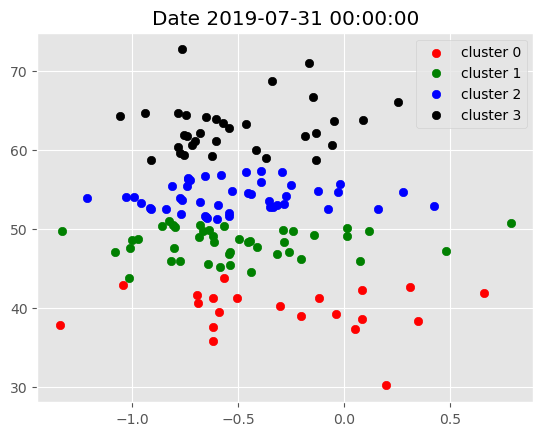

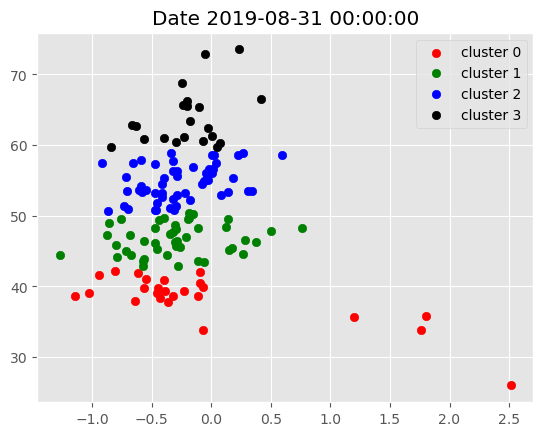

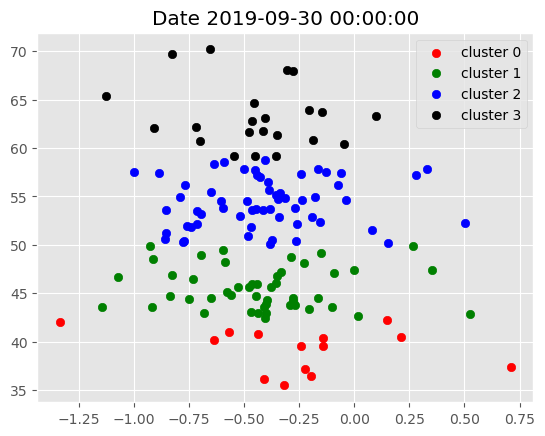

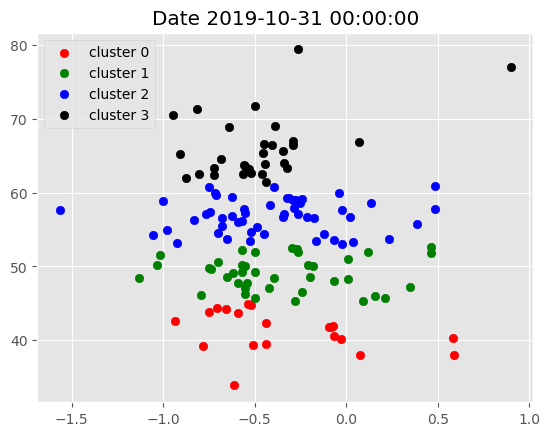

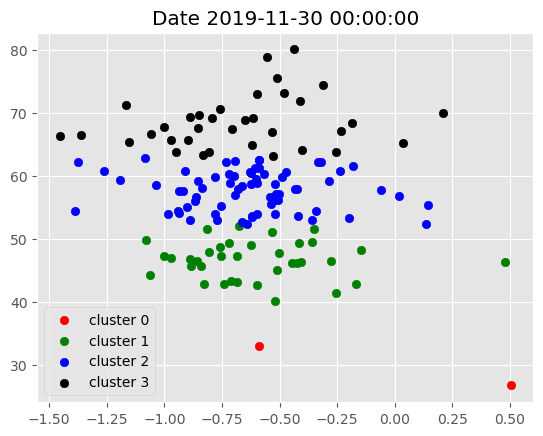

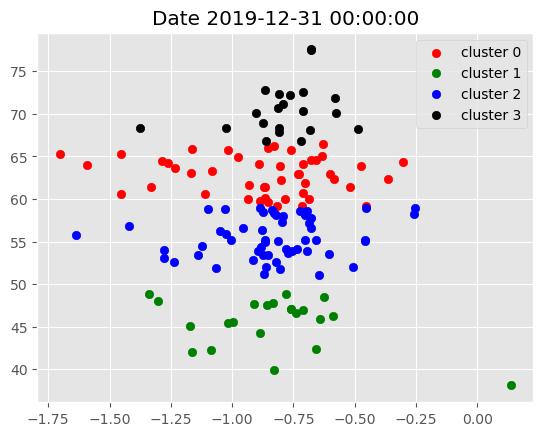

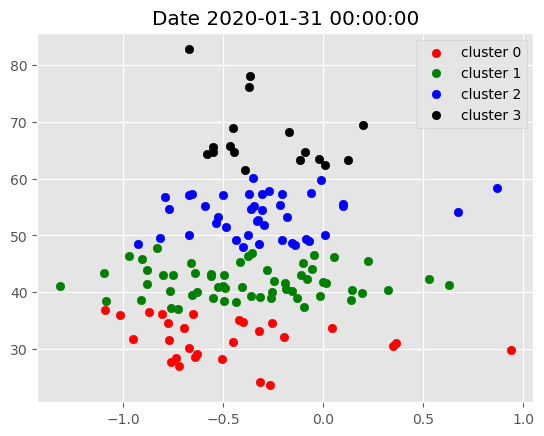

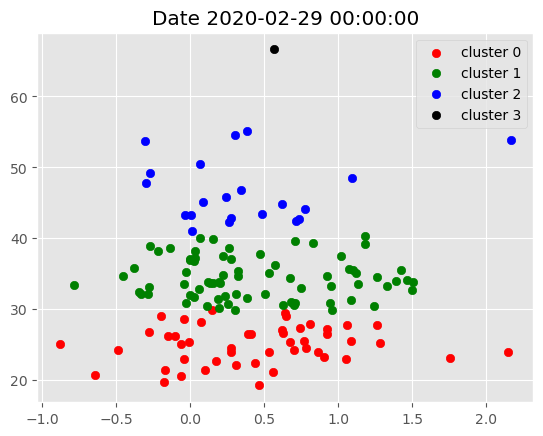

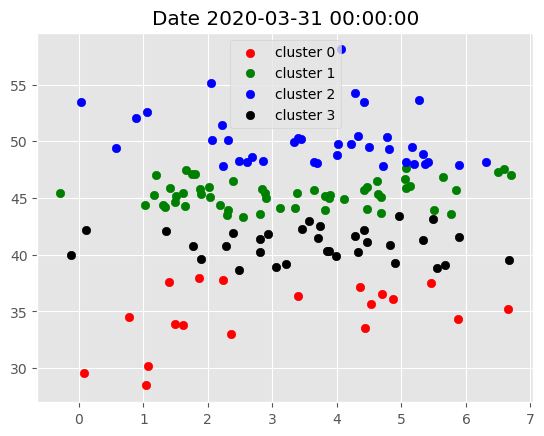

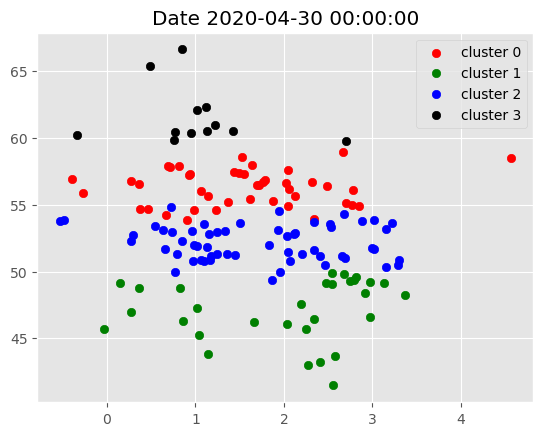

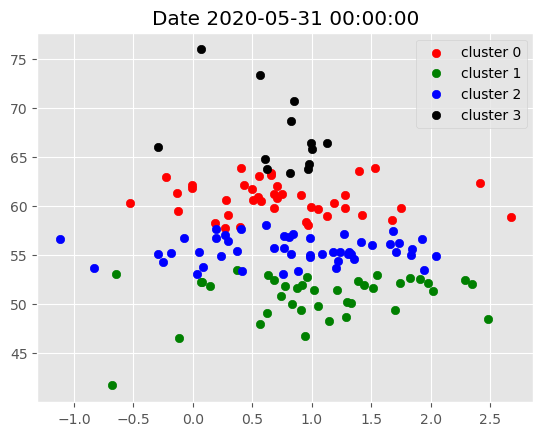

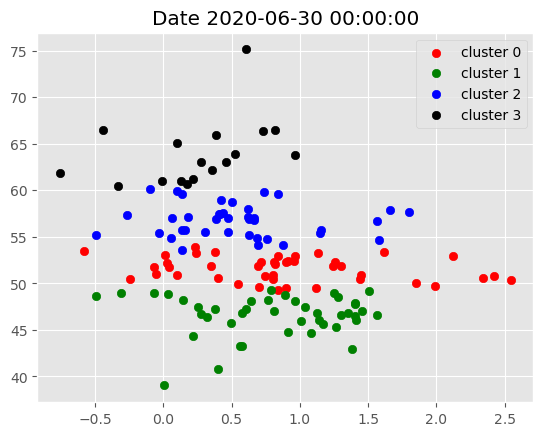

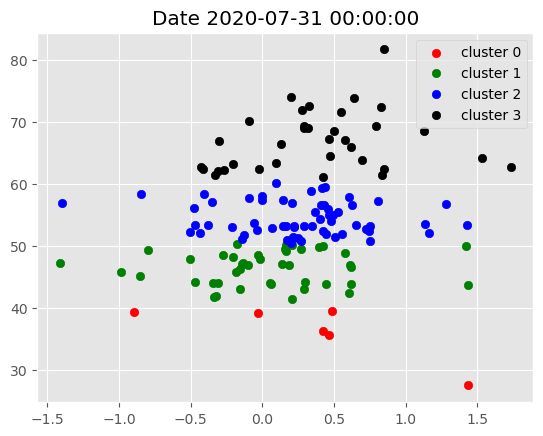

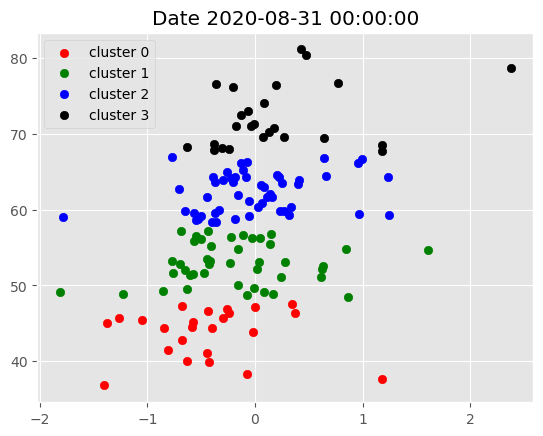

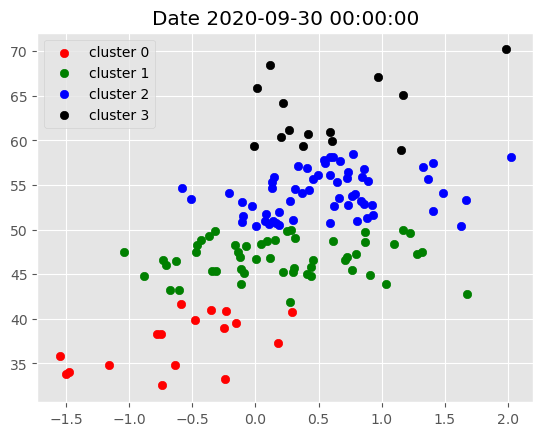

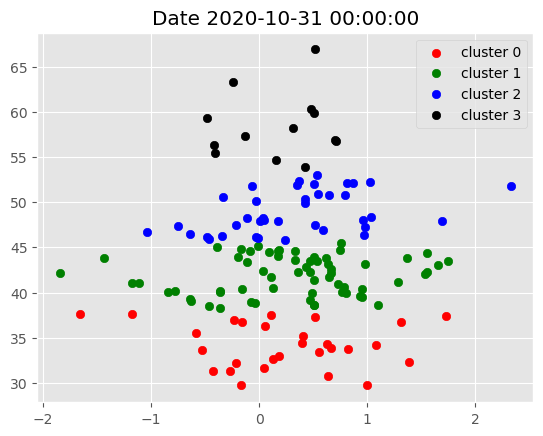

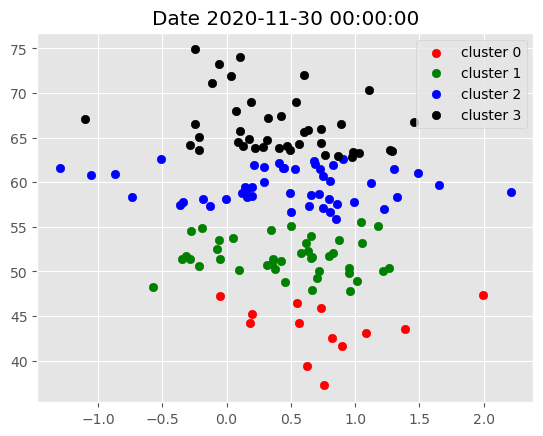

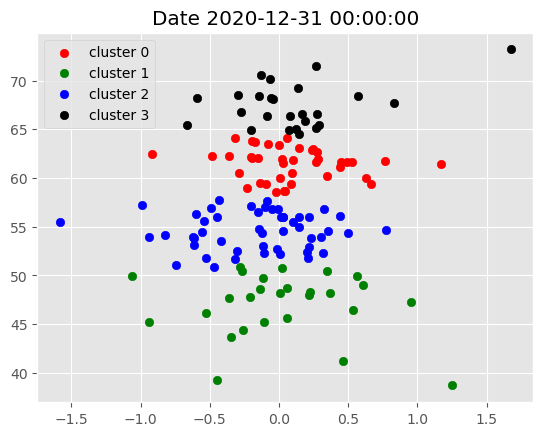

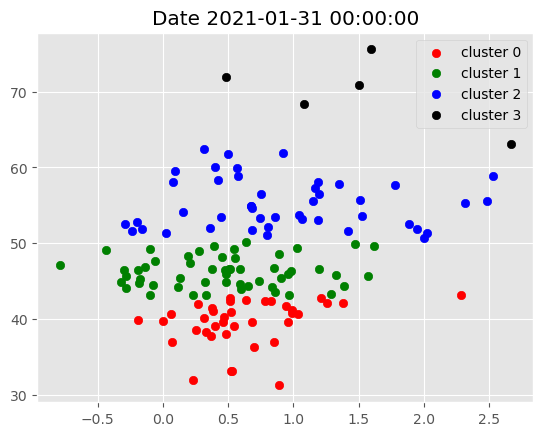

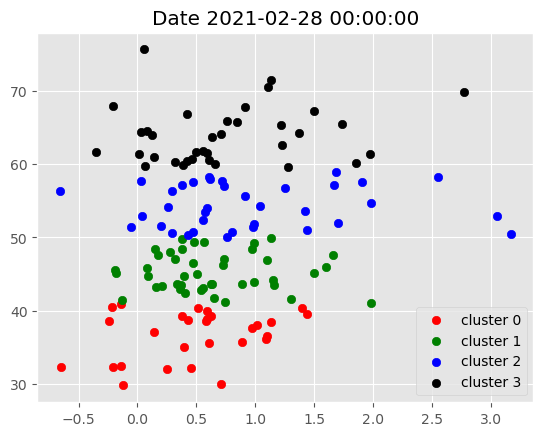

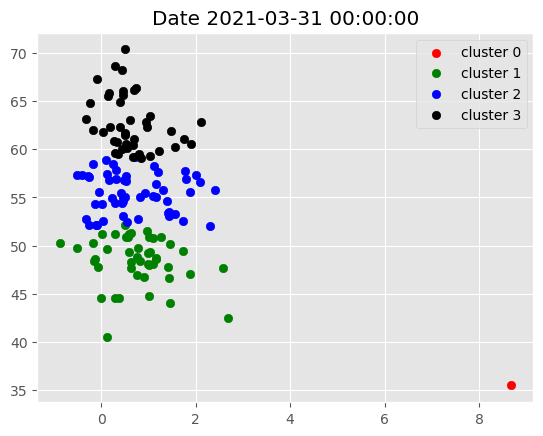

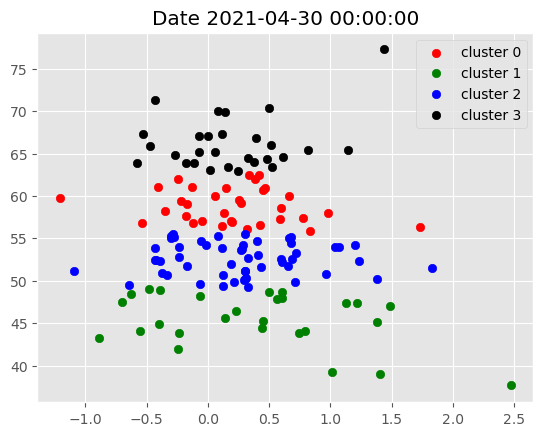

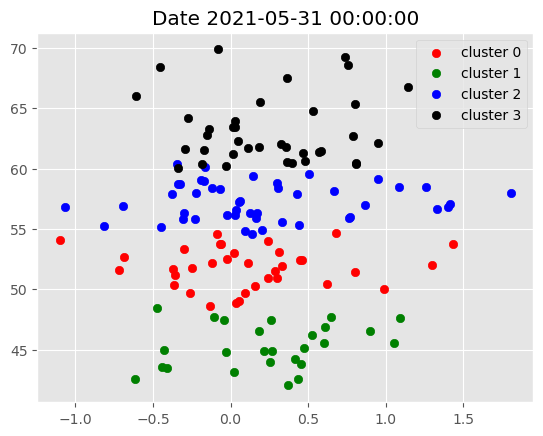

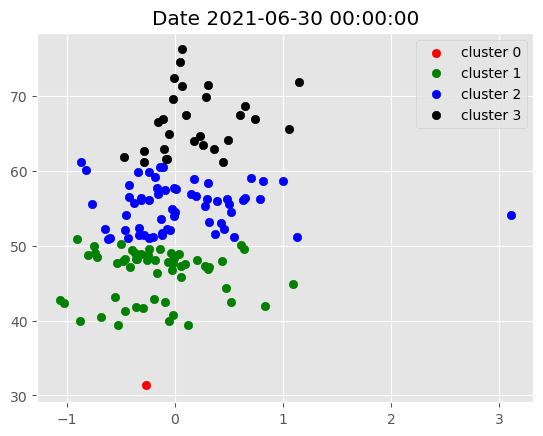

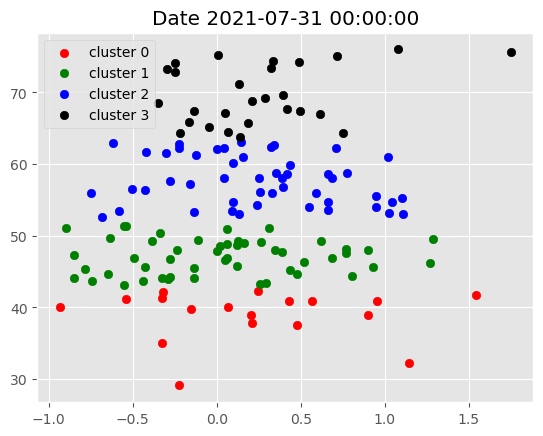

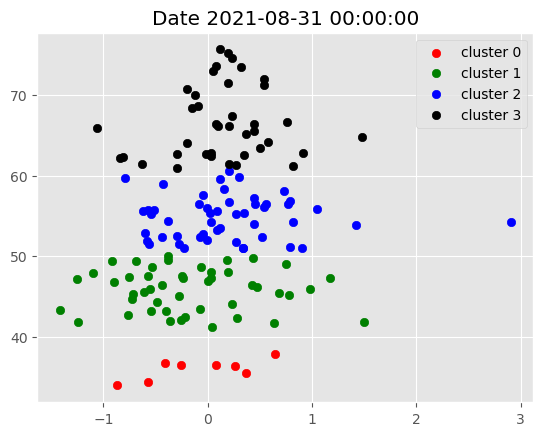

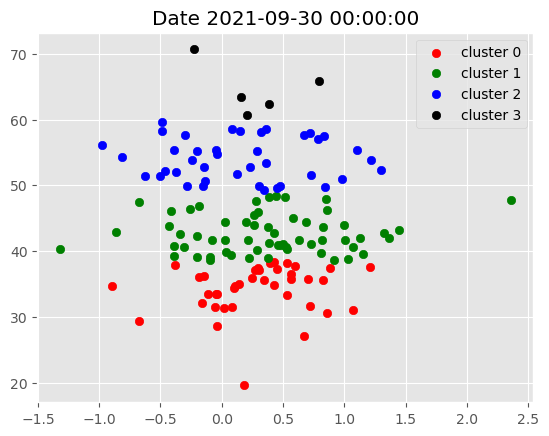

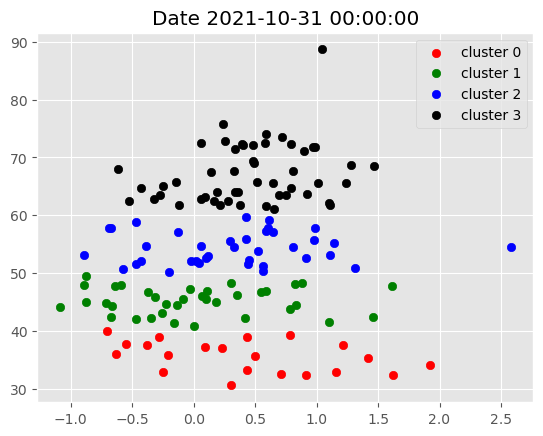

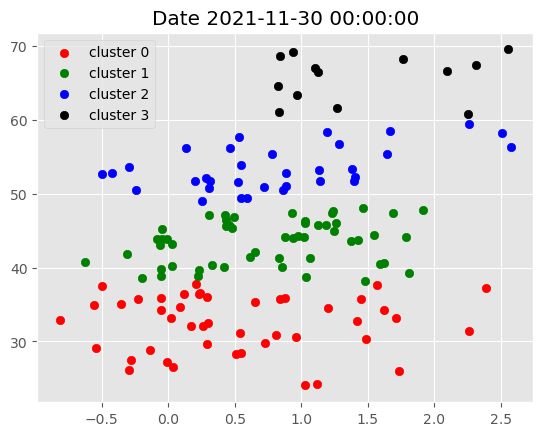

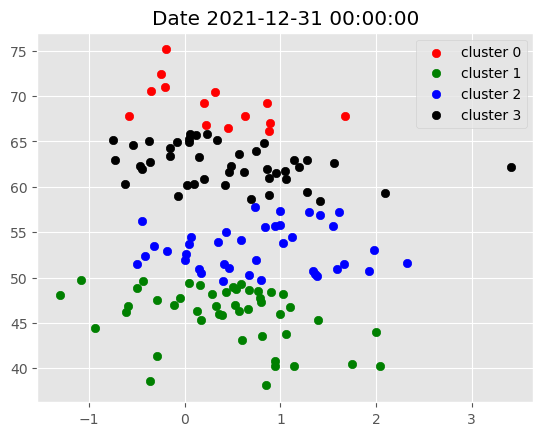

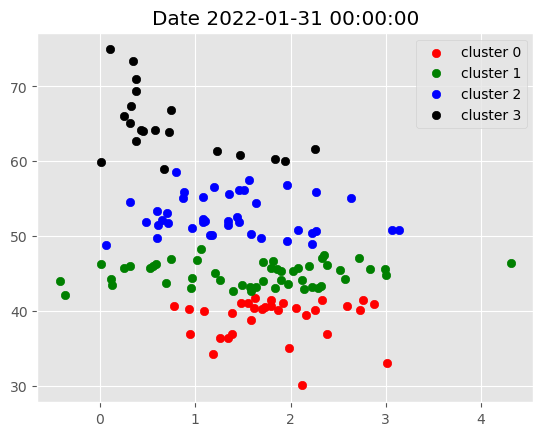

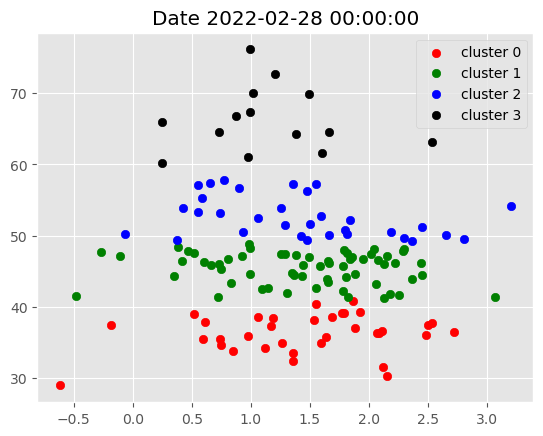

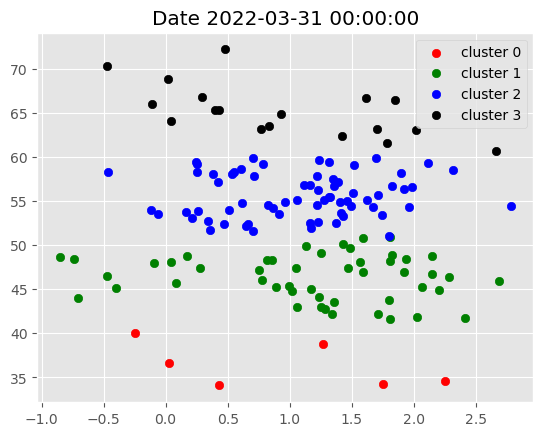

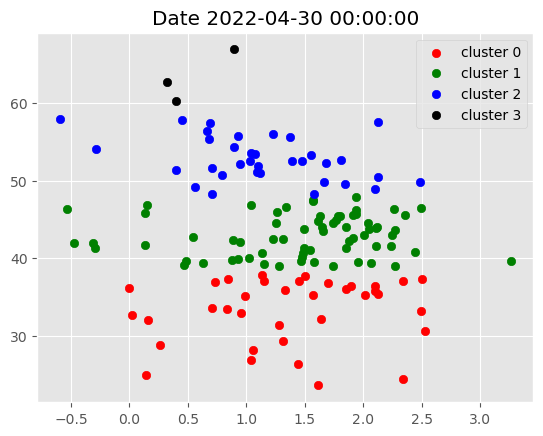

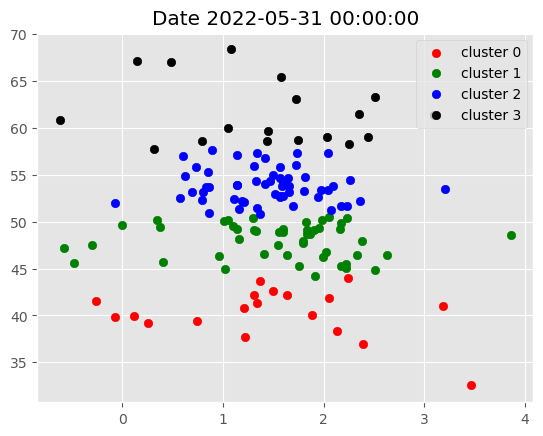

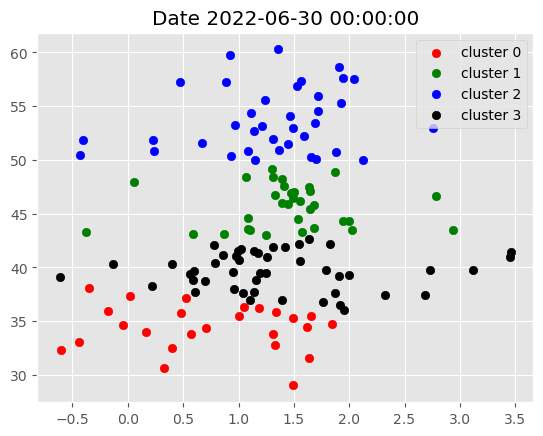

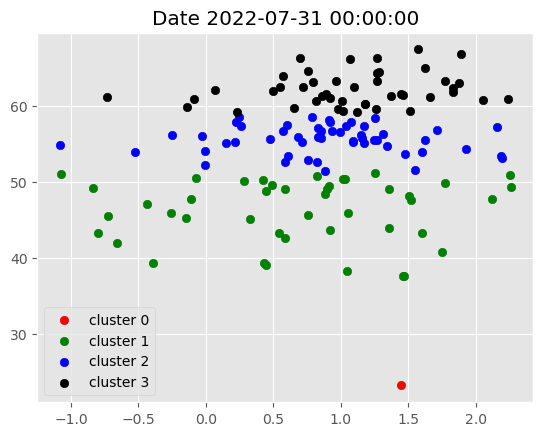

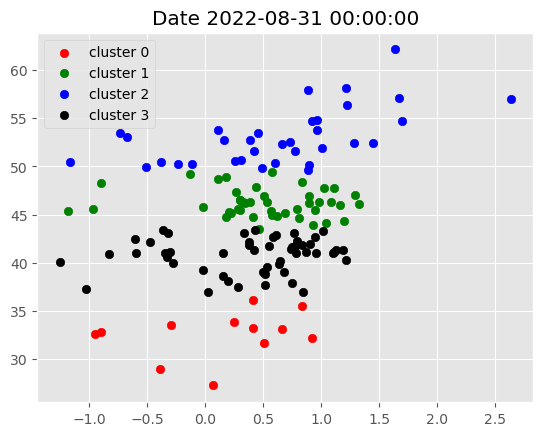

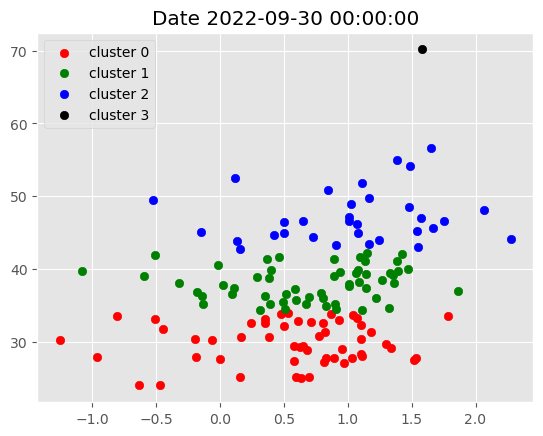

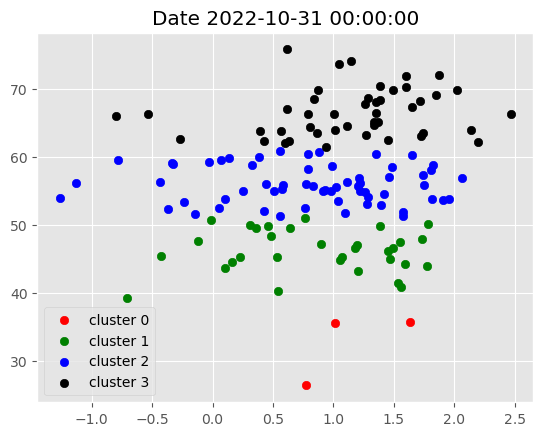

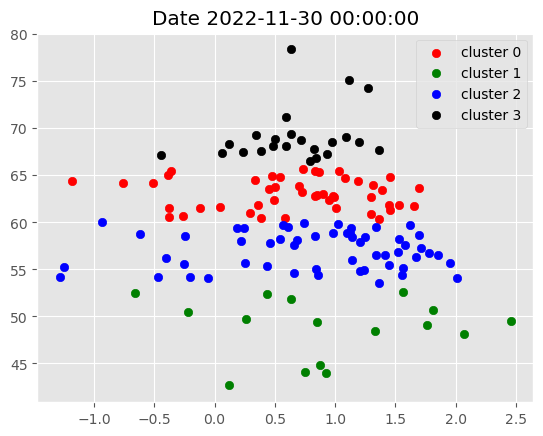

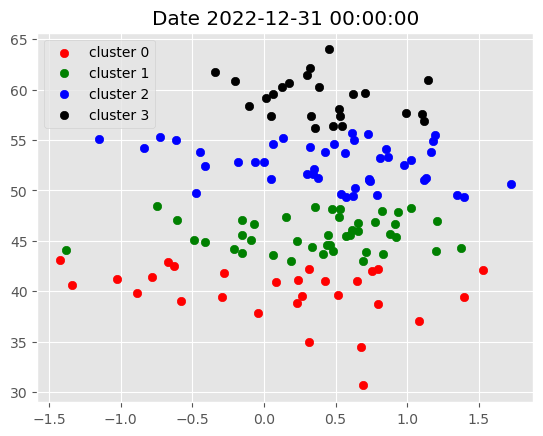

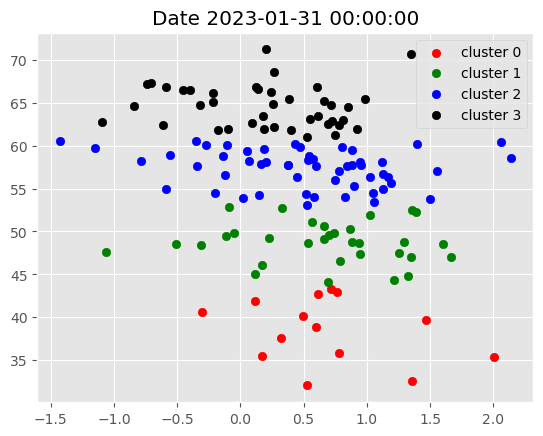

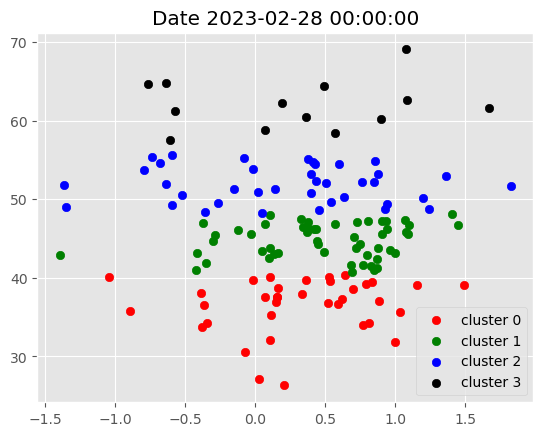

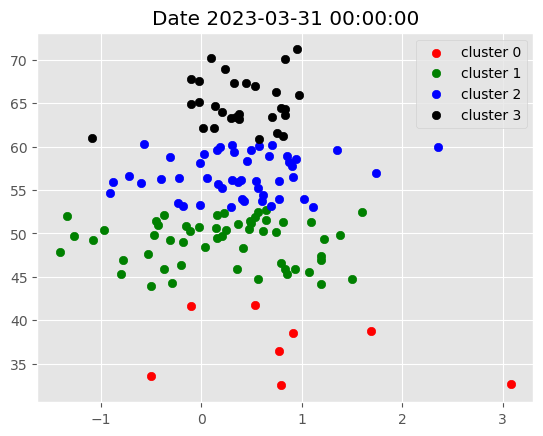

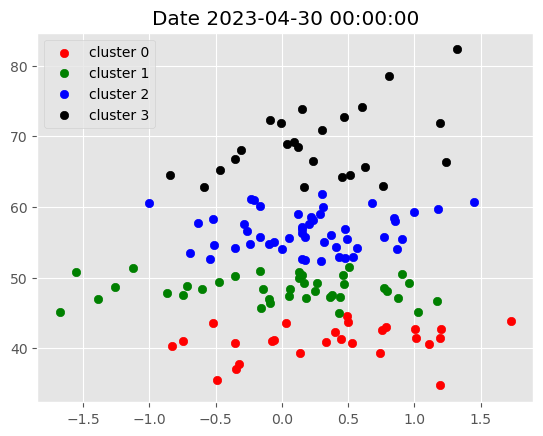

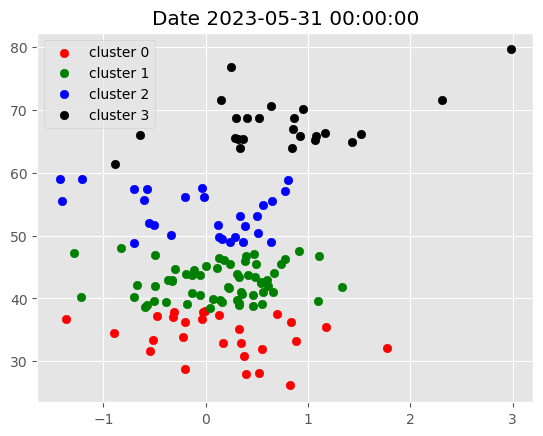

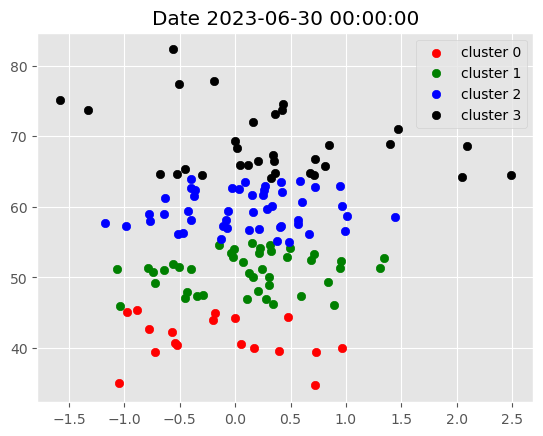

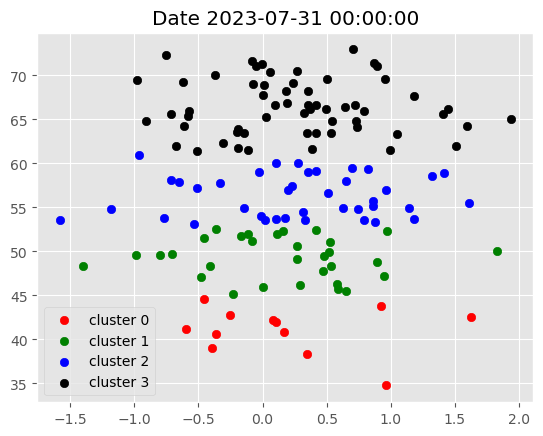

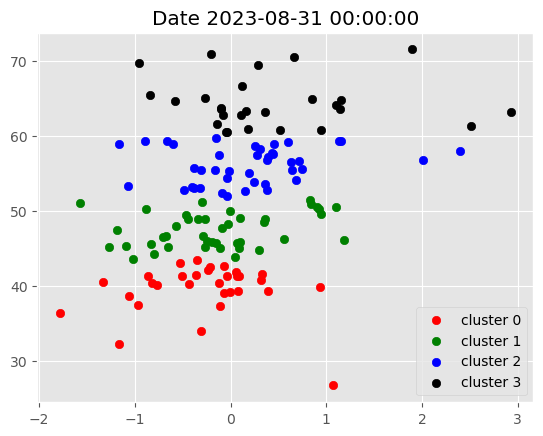

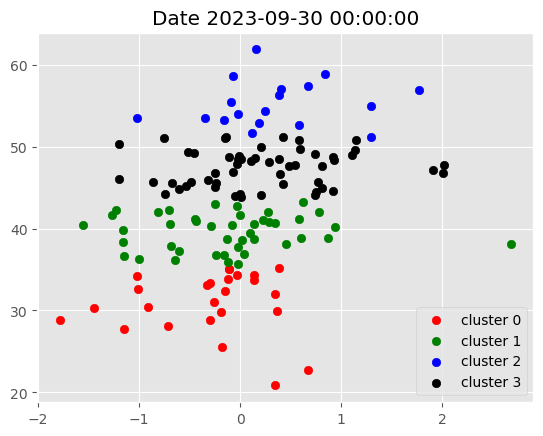

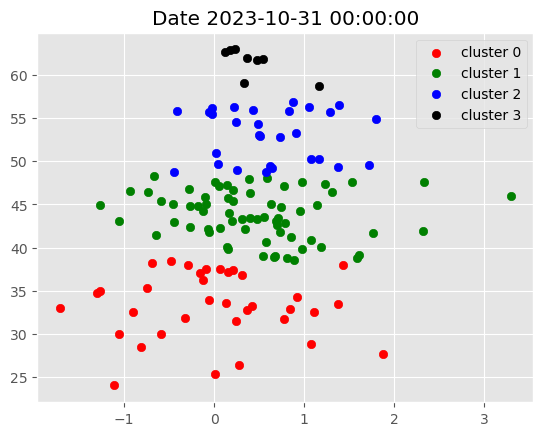

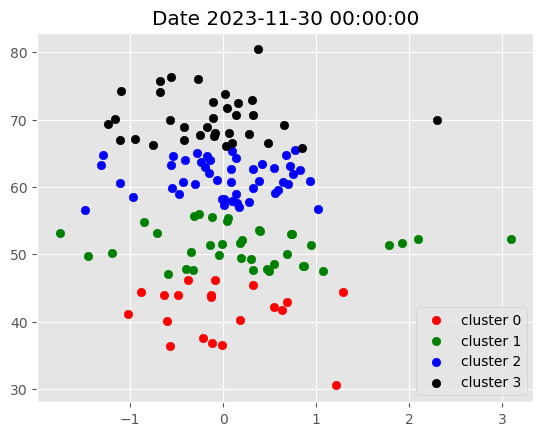

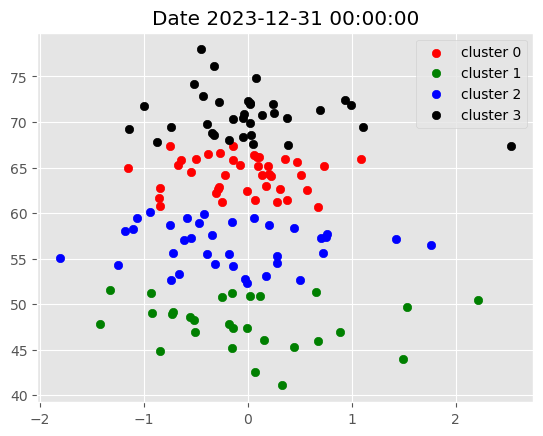

In [29]:
plt.style.use('ggplot')

for i in data.index.get_level_values('date').unique().tolist():
    
    g = data.xs(i, level=0)
    
    plt.title(f'Date {i}')
    
    plot_clusters(g)

In [23]:
target_rsi_values = [30, 45, 55, 70]

initial_centroids = np.zeros((len(target_rsi_values), 18))

initial_centroids[:, 6] = target_rsi_values

initial_centroids

array([[ 0.,  0.,  0.,  0.,  0.,  0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 55.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 70.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])

In [30]:
filtered_df = data[data['cluster']==3].copy()

filtered_df = filtered_df.reset_index(level=1)

filtered_df.index = filtered_df.index+pd.DateOffset(1)

filtered_df = filtered_df.reset_index().set_index(['date', 'ticker'])

dates = filtered_df.index.get_level_values('date').unique().tolist()

fixed_dates = {}

for d in dates:
    
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()
    
fixed_dates

{'2018-02-01': ['ABT',
  'ADBE',
  'AMZN',
  'BA',
  'BAC',
  'CHTR',
  'CRM',
  'CTSH',
  'DG',
  'EA',
  'GD',
  'GOOG',
  'GOOGL',
  'JPM',
  'KR',
  'LMT',
  'LOW',
  'MA',
  'MAR',
  'MSFT',
  'NFLX',
  'NKE',
  'NVDA',
  'NXPI',
  'PNC',
  'PYPL',
  'RTX',
  'TMO',
  'V',
  'WFC',
  'WMT'],
 '2018-03-01': ['AAPL',
  'ADBE',
  'AMZN',
  'BA',
  'BKNG',
  'CRM',
  'CSCO',
  'CTSH',
  'INTC',
  'MA',
  'MU',
  'NFLX',
  'NXPI',
  'PANW',
  'TJX'],
 '2018-04-01': ['AMT',
  'BKNG',
  'CL',
  'COP',
  'INTC',
  'NEE',
  'PANW',
  'STZ',
  'TJX',
  'WYNN'],
 '2018-05-01': ['CMG', 'COP', 'EOG', 'HAL', 'OXY', 'PXD', 'ULTA', 'VLO'],
 '2018-06-01': ['ADBE',
  'AMD',
  'AMZN',
  'BIIB',
  'CMG',
  'CSX',
  'DVN',
  'EXPE',
  'GM',
  'LLY',
  'LOW',
  'META',
  'NEE',
  'NFLX',
  'OXY',
  'PANW',
  'TJX',
  'TXN',
  'VLO'],
 '2018-07-01': ['ACN',
  'AMT',
  'BSX',
  'COST',
  'CRM',
  'DVN',
  'EA',
  'EOG',
  'EQIX',
  'KR',
  'MDLZ',
  'NEE',
  'NFLX',
  'NKE',
  'PARA',
  'PEP',
  'PG',
  

In [34]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

def optimize_weights(prices, lower_bound=0):
    
    returns = expected_returns.mean_historical_return(prices=prices,
                                                      frequency=252)
    
    cov = risk_models.sample_cov(prices=prices,
                                 frequency=252)
    
    ef = EfficientFrontier(expected_returns=returns,
                           cov_matrix=cov,
                           weight_bounds=(lower_bound, .1),
                           solver='SCS')
    
    weights = ef.max_sharpe()
    
    return ef.clean_weights()

In [35]:
stocks = data.index.get_level_values('ticker').unique().tolist()

new_df = yf.download(tickers=stocks,
                     start=data.index.get_level_values('date').unique()[0]-pd.DateOffset(months=12),
                     end=data.index.get_level_values('date').unique()[-1])

new_df

[*********************100%%**********************]  158 of 158 completed


Adj Close                                                  \
                  AAL        AAPL        ABBV         ABT         ACN   
Date                                                                    
2017-01-31  42.760242   28.233547   45.380981   37.100906  102.222733   
2017-02-01  42.566982   29.955252   45.217602   37.598312  101.630226   
2017-02-02  42.528320   29.904060   45.217602   37.971359  102.016266   
2017-02-03  42.711922   30.032024   45.054222   37.998005  102.779312   
2017-02-06  43.774895   30.313541   45.039371   37.687134  102.501030   
...               ...         ...         ...         ...         ...   
2023-12-22  14.310000  193.600006  154.940002  109.029999  354.450012   
2023-12-26  14.110000  193.050003  154.619995  109.230003  353.429993   
2023-12-27  13.990000  193.149994  154.880005  109.790001  353.820007   
2023-12-28  13.980000  193.580002  154.750000  110.400002  351.589996   
2023-12-29  13.740000  192.529999  154.970001  110.070000  350.910004   

                                                                       ...  \
                  ADBE         ADP        ADSK        AIG        AMAT  ...   
Date                                                                   ...   
2017-01-31  113.379997   87.153648   81.339996  53.358707   31.547501  ...   
2017-02-01  113.360001   82.200073   81.279999  53.367001   32.265957  ...   
2017-02-02  113.160004   83.123482   82.760002  53.242455   32.183067  ...   
2017-02-03  115.169998   83.598122   84.410004  53.923355   32.523876  ...   
2017-02-06  114.459999   83.252922   82.820000  53.890141   32.404121  ...   
...                ...         ...         ...        ...         ...  ...   
2023-12-22  598.750000  230.970001  242.759995  66.930000  162.050003  ...   
2023-12-26  598.260010  232.539993  245.070007  67.129997  164.279999  ...   
2023-12-27  596.080017  231.610001  245.110001  67.150002  164.210007  ...   
2023-12-28  595.520020  232.490005  244.910004  67.870003  163.119995  ...   
2023-12-29  596.599976  232.970001  243.479996  67.750000  162.070007  ...   

              Volume                                                  \
                   V       VLO     VRTX        VZ       WBA      WDC   
Date                                                                   
2017-01-31   7479400  11657700  2418400  16844200   3424400  3617800   
2017-02-01   7534400   5204500  1754700  26004100   5080000  3897800   
2017-02-02  11142300   6193200  1290800  17787200   3667400  2982700   
2017-02-03  28079600   4416400  1226800  15166400   3167700  2624900   
2017-02-06   9665300   4297800  1423800  16151400   3418400  2307400   
...              ...       ...      ...       ...       ...      ...   
2023-12-22   5111500   2279000   804200  13157900   9776300  2936500   
2023-12-26   2085100   1807100   531600  11856600  10181100  2010800   
2023-12-27   4034700   1358000   594000  15267600   8265500  2167200   
2023-12-28   3020500   1661200   735600  14931700   7899900  4200000   
2023-12-29   4074600   1963400   727400  16205200  10853300  3478100   

                                                  
                 WFC      WMT     WYNN       XOM  
Date                                              
2017-01-31  22409100  9320900  1827500  19128100  
2017-02-01  21157700  9050000  3025400  15111800  
2017-02-02  13044400  8998700  1698700  12200100  
2017-02-03  19879800  7625300  1888800  12746300  
2017-02-06  13940200  9097200  2828800   9938200  
...              ...      ...      ...       ...  
2023-12-22  10448000  6467400  1170500  12921800  
2023-12-26   8856600  3893300  1150000  16835100  
2023-12-27  12536700  6632000  1142200  14558800  
2023-12-28   9872600  5592000  1233000  16329300  
2023-12-29  11731900  7314200  1144800  17741400  

[1741 rows x 948 columns]

In [36]:
returns_dataframe = np.log(new_df['Adj Close']).diff()

portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():
    
    try:

        end_date = (pd.to_datetime(start_date)+pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')

        cols = fixed_dates[start_date]

        optimization_start_date = (pd.to_datetime(start_date)-pd.DateOffset(months=12)).strftime('%Y-%m-%d')

        optimization_end_date = (pd.to_datetime(start_date)-pd.DateOffset(days=1)).strftime('%Y-%m-%d')
        
        optimization_df = new_df[optimization_start_date:optimization_end_date]['Adj Close'][cols]
        
        success = False
        try:
            weights = optimize_weights(prices=optimization_df,
                                   lower_bound=round(1/(len(optimization_df.columns)*2),3))

            weights = pd.DataFrame(weights, index=pd.Series(0))
            
            success = True
        except:
            print(f'Max Sharpe Optimization failed for {start_date}, Continuing with Equal-Weights')
        
        if success==False:
            weights = pd.DataFrame([1/len(optimization_df.columns) for i in range(len(optimization_df.columns))],
                                     index=optimization_df.columns.tolist(),
                                     columns=pd.Series(0)).T
        
        temp_df = returns_dataframe[start_date:end_date]

        temp_df = temp_df.stack().to_frame('return').reset_index(level=0)\
                   .merge(weights.stack().to_frame('weight').reset_index(level=0, drop=True),
                          left_index=True,
                          right_index=True)\
                   .reset_index().set_index(['Date', 'index']).unstack().stack()

        temp_df.index.names = ['date', 'ticker']

        temp_df['weighted_return'] = temp_df['return']*temp_df['weight']

        temp_df = temp_df.groupby(level=0)['weighted_return'].sum().to_frame('Strategy Return')

        portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)
    
    except Exception as e:
        print(e)

portfolio_df = portfolio_df.drop_duplicates()

portfolio_df

Max Sharpe Optimization failed for 2018-05-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2019-01-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-03-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-04-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2021-02-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2021-10-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2022-05-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2022-09-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2022-10-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2023-11-01, Continuing with Equal-Weights
'return'


,Strategy Return
date,
2018-02-01,-0.007297
2018-02-02,-0.017578
2018-02-05,-0.041377
2018-02-06,0.017329
2018-02-07,0.002043
...,...
2023-12-22,0.002407
2023-12-26,0.005684
2023-12-27,0.002800


In [37]:
spy = yf.download(tickers='SPY',
                  start='2015-01-01',
                  end=dt.date.today())

spy_ret = np.log(spy[['Adj Close']]).diff().dropna().rename({'Adj Close':'SPY Buy&Hold'}, axis=1)

portfolio_df = portfolio_df.merge(spy_ret,
                                  left_index=True,
                                  right_index=True)

portfolio_df

[*********************100%%**********************]  1 of 1 completed


,Strategy Return,SPY Buy&Hold
2018-02-01,-0.007297,-0.001136
2018-02-02,-0.017578,-0.022010
2018-02-05,-0.041377,-0.042722
2018-02-06,0.017329,0.019511
2018-02-07,0.002043,-0.005440
...,...,...
2023-12-22,0.002407,0.002008
2023-12-26,0.005684,0.004214
2023-12-27,0.002800,0.001806
2023-12-28,-0.000932,0.000378


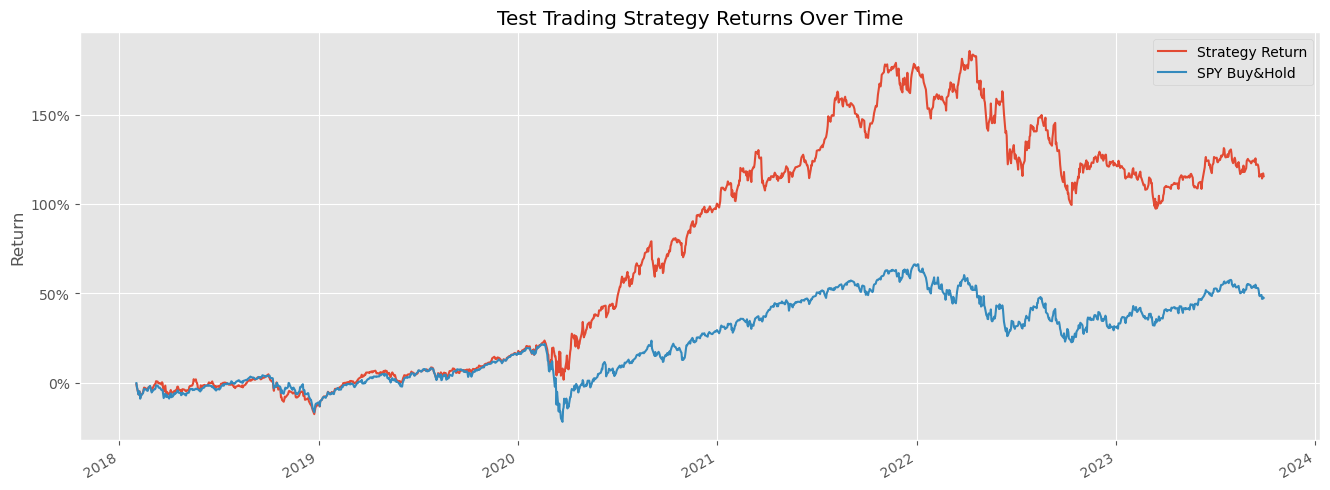

In [39]:
import matplotlib.ticker as mtick

plt.style.use('ggplot')

portfolio_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum())-1

portfolio_cumulative_return[:'2023-09-29'].plot(figsize=(16,6))

plt.title('Test Trading Strategy Returns Over Time')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')

plt.show()